In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

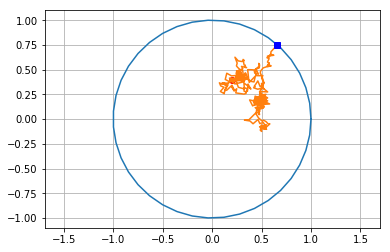

In [71]:
#Brownianmotion function
def brownianmotion(X, delta): # X=(x,y)
    liste_x = [X[0]]
    liste_y = [X[1]]
    i = 0
    while ((liste_x[-1]**2+liste_y[-1]**2) <=1) & (i <100000):
        nouvelle_position_x = liste_x[-1] + np.sqrt(delta)*np.random.randn(1)
        nouvelle_position_y = liste_y[-1] + np.sqrt(delta)*np.random.randn(1)
        liste_x.append(nouvelle_position_x)
        liste_y.append(nouvelle_position_y)
        i+=1
    
    Xinter = np.array([-2.0,-2.0])
    
    if (liste_x[-1]**2+liste_y[-1]**2) >=1:
        derniers_x = np.array(liste_x[-2:len(liste_x)]).reshape(2,)
        derniers_y = np.array(liste_y[-2:len(liste_y)]).reshape(2,)
        
        a,b = np.polyfit(derniers_x,derniers_y,deg=1)
        #a,b = np.polyfit([liste_x[-2],liste_x[-1]],[liste_y[-2],liste_y[-1]],deg=1)
        
        x1 = (-a*b + np.sqrt((a**2-b**2+1)))/(1+a**2)
        x11 = (-a*b - np.sqrt((a**2-b**2+1)))/(1+a**2)

        if (x1>=liste_x[-2] and x1<=liste_x[-1]) or (x1<=liste_x[-2] and x1>=liste_x[-1]):
            Xinter[0] = x1
            Xinter[1] = a*x1+b
            
        else:
            Xinter[0] = x11
            Xinter[1] = a*x11+b
        
    
    return (liste_x,liste_y,Xinter)


# Paramètres
delta = 0.001
X_init = np.array([0.2,0.4])

# Plot cercle
theta = np.linspace(0, 2*np.pi, 40)
x_cos = np.cos(theta)
y_sin = np.sin(theta)
plt.plot(x_cos, y_sin)
plt.axis("equal")
plt.grid()


# Plot position initiale
plt.plot(X_init[0],X_init[1],"ro")

# Trajectoire
liste_x, liste_y, Xinter = brownianmotion(X_init, delta)
plt.plot(liste_x,liste_y)


# Plot Xinter
if Xinter[0] != -2:
    plt.plot(Xinter[0],Xinter[1],"bs")




    
    

(-1.0965951735409205,
 1.0998378654067105,
 -1.0993190013341618,
 1.1035410682428655)

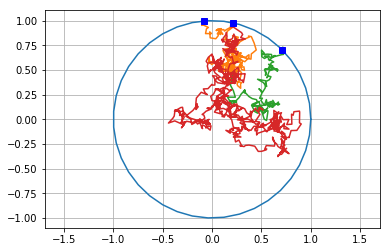

In [74]:
# Paramètres
delta = 0.001
X_init = np.array([0.2,0.4])

# Plot cercle
theta = np.linspace(0, 2*np.pi, 40)
x_cos = np.cos(theta)
y_sin = np.sin(theta)
plt.plot(x_cos, y_sin)
plt.axis("equal")
plt.grid()


# Plot position initiale
plt.plot(X_init[0],X_init[1],"ro")

# Trajectoire 1
liste_x, liste_y, Xinter = brownianmotion(X_init, delta)
plt.plot(liste_x,liste_y)

if Xinter[0] != -2:
    plt.plot(Xinter[0],Xinter[1],"bs")
    
    
# Trajectoire 2 
liste_x, liste_y, Xinter = brownianmotion(X_init, delta)
plt.plot(liste_x,liste_y)

if Xinter[0] != -2:
    plt.plot(Xinter[0],Xinter[1],"bs")
    
    
# Trajectoire 3
liste_x, liste_y, Xinter = brownianmotion(X_init, delta)
plt.plot(liste_x,liste_y)

if Xinter[0] != -2:
    plt.plot(Xinter[0],Xinter[1],"bs")



# Exercise 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

(375, 500, 3)


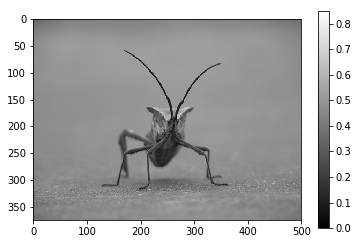

In [95]:
filename = r'U:\DAD\Python\TP3_DUROUCHOUX_TRINH\TP3_archive\stinkbug.png'

img = mpimg.imread(filename)
print(img.shape)

plt.imshow(img,origin="upper", cmap='gray', interpolation = 'nearest')
plt.colorbar()
plt.show()

(375, 500)


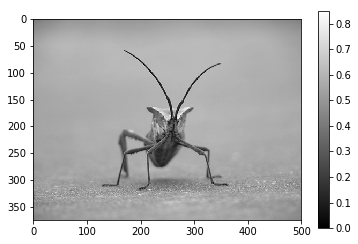

In [94]:
lum_img = img[:,:,0]
print(lum_img.shape)
plt.imshow(lum_img,origin="upper", cmap='gray', interpolation = 'nearest')
plt.colorbar()
plt.show()

(375, 500)
[[103335.69      1112.9407    2384.3474  ...    564.9546    2384.3474
    1112.9407 ]
 [  3902.982     2334.745     1419.2739  ...    767.9491     898.979
    2189.6355 ]
 [   306.27863    866.26495   1231.8727  ...    228.81491    688.3357
    1350.8102 ]
 ...
 [  1025.2467     163.44673    450.7372  ...    474.28665    573.16095
     354.46255]
 [   306.27866   1350.8102     688.3357  ...    785.3111    1231.8727
     866.26495]
 [  3902.9822    2189.6355     898.979   ...   1341.2742    1419.2739
    2334.745  ]]


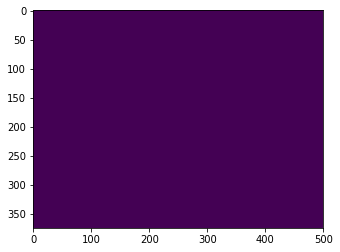

In [110]:
fourier_transform = np.fft.fft2(lum_img)
print(fourier_transform.shape)
modulus = np.abs(fourier_transform)

plt.imshow(modulus)
print(modulus)

In [3]:
signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
fourier = np.fft.fft(signal)
n = signal.size
timestep = 0.1
freq = np.fft.fftfreq(n, d=timestep)
freq

array([ 0.  ,  1.25,  2.5 ,  3.75, -5.  , -3.75, -2.5 , -1.25])

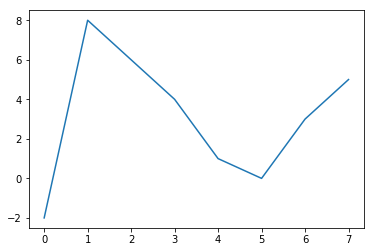

In [6]:
plt.plot(signal)


In [7]:
print(fourier)

[ 25.        +0.j           3.36396103-7.94974747j
 -10.        +1.j          -9.36396103-1.94974747j
  -9.        +0.j          -9.36396103+1.94974747j
 -10.        -1.j           3.36396103+7.94974747j]
